In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [23]:
file = open("/kaggle/input/satdfdf/pg84.txt", "r", encoding = "utf8")
 
# store file in list
lines = []
for i in file:
    lines.append(i)
 
# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 
 
#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space
 
#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of Frankenstein; Or, The Modern Prometheus This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this ebook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before usin'

In [24]:
	
len(data)

436626

In [25]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
 
# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))
 
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 98, 199, 683, 4, 301, 35, 1, 601, 1618, 25, 683, 31, 22, 1]

In [26]:
len(sequence_data)

78382

In [27]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

7492


In [28]:
sequences = []
 
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
     
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  78379


array([[   1,   98,  199,  683],
       [  98,  199,  683,    4],
       [ 199,  683,    4,  301],
       [ 683,    4,  301,   35],
       [   4,  301,   35,    1],
       [ 301,   35,    1,  601],
       [  35,    1,  601, 1618],
       [   1,  601, 1618,   25],
       [ 601, 1618,   25,  683],
       [1618,   25,  683,   31]])

In [29]:
X = []
y = []
 
for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
     
X = np.array(X)
y = np.array(y)

In [30]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[   1   98  199]
 [  98  199  683]
 [ 199  683    4]
 [ 683    4  301]
 [   4  301   35]
 [ 301   35    1]
 [  35    1  601]
 [   1  601 1618]
 [ 601 1618   25]
 [1618   25  683]]
Response:  [ 683    4  301   35    1  601 1618   25  683   31]


In [31]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [32]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
from tensorflow import keras
# from keras.utils.vis_utils import plot_model
 
# keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)


In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint
 
checkpoint = ModelCheckpoint("next_words.keras", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy",metrics=["accuracy"], optimizer=Adam(learning_rate=0.001))
history = model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
1224/1225 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0580 - loss: 6.8118
Epoch 1: loss improved from inf to 6.51550, saving model to next_words.keras
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.0581 - loss: 6.8113
Epoch 2/70
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1015 - loss: 5.9851
Epoch 2: loss improved from 6.51550 to 5.96855, saving model to next_words.keras
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.1015 - loss: 5.9851
Epoch 3/70
1223/1225 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1258 - loss: 5.6604
Epoch 3: loss improved from 5.96855 to 5.63768, saving model to next_words.keras
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.1258 - loss: 5.6604
Epoch 4/70
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1364 - loss: 5.3552
Epoch 4: loss improved from 5.63768 to 5.36115, saving model to next_words.keras
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.1364 - loss: 5.3552
Epoch 5/

In [36]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle
 
# Load the model and tokenizer
model = load_model('next_words.keras')
tokenizer = pickle.load(open('token.pkl', 'rb'))
 
def Predict_Next_Words(model, tokenizer, text):
 
  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
   
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
   
  print(predicted_word)
  return predicted_word

In [37]:
while(True):
  text = input("Enter your line: ")
   
  if text == "0":
      print("Execution completed.....")
      break
   
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
         
          Predict_Next_Words(model, tokenizer, text)
           
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line:  0


Execution completed.....


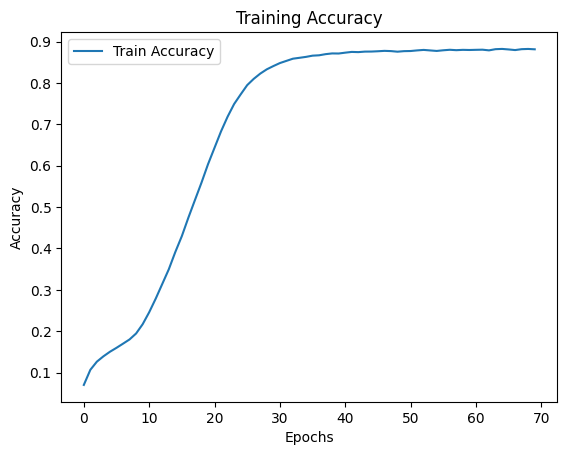

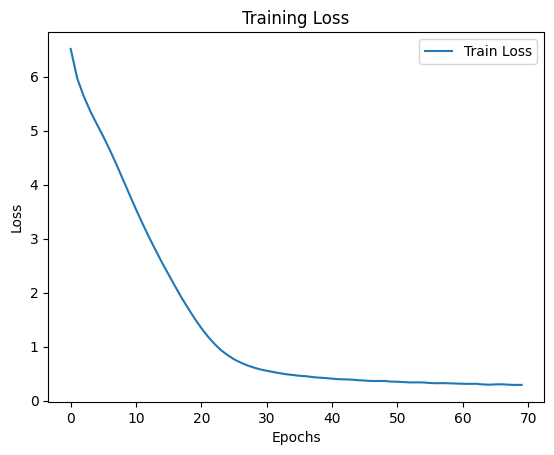

In [39]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()
